#CIFAR-100 IMAGE CLASSIFICATION


1. DATASET SETUP

1.1) LIBRARY IMPORT

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

1.2) LOAD DATASET

load the dataset and split it to train and test images and labels

In [2]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.cifar100.load_data(label_mode="fine")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [6]:
test_images.shape

(10000, 32, 32, 3)

Since, data is already in shape such that it has channel dimension we dont need to reshape data

array([[[156, 153, 147],
        [151, 151, 143],
        [158, 157, 152],
        ...,
        [145, 143, 130],
        [145, 142, 134],
        [146, 144, 137]],

       [[150, 148, 139],
        [150, 150, 139],
        [156, 155, 150],
        ...,
        [142, 141, 124],
        [147, 144, 134],
        [148, 148, 142]],

       [[145, 143, 134],
        [155, 154, 147],
        [157, 156, 151],
        ...,
        [143, 142, 125],
        [153, 151, 139],
        [152, 150, 145]],

       ...,

       [[139, 137, 125],
        [151, 150, 138],
        [150, 145, 134],
        ...,
        [154, 146, 129],
        [157, 150, 141],
        [160, 157, 151]],

       [[145, 140, 125],
        [149, 149, 138],
        [148, 143, 130],
        ...,
        [153, 144, 132],
        [155, 149, 138],
        [160, 156, 150]],

       [[150, 146, 132],
        [145, 144, 132],
        [150, 147, 133],
        ...,
        [160, 150, 143],
        [157, 151, 139],
        [148, 144, 132]]], dtype=uint8)
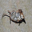

In [8]:
train_images[20]

1.3) One hot encoding

Since the dataset has 100 classes we one hot encode them and have 100 output classes

In [14]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=100)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=100)

In [9]:
print("Training image shape: ",train_images.shape)
print("Training labels shape: ",train_labels.shape)
print("Testing image shape: ",test_images.shape)
print("Testing label shape: ",test_labels.shape)

Training image shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Testing image shape:  (10000, 32, 32, 3)
Testing label shape:  (10000, 1)


#2. Model Building

2.1) Basic ANN Model


*   Flatten(32*32->1024)->0 params
*   Dense(512,ReLU)->1,573,376 params

*   Dense(256,ReLU)->131,328 params
*   Dense(128,ReLU)->32,896 params


*   Dense(100,Softmax)->12,900 params

Total params: ~1700K






In [11]:
ann_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(100,activation='softmax')
])

ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,750,500 (6.68 MB)

 Trainable params: 1,750,500 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

2.2) Basic CNN Model



*   Conv2D (64,3*3) + MaxPool -> 640 params
*   Conv2D (128,3*3) + MaxPool -> 1280 params


*   Dense(128, ReLU) -> 58952 params
*   Dense(100,Softmax) -> 12900 params

Total Params: ~700K





In [12]:
cnn_model=keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(100,activation='softmax')
])

cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 678,500 (2.59 MB)

 Trainable params: 678,500 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

2.3) Deeper CNN Model

Conv2D (64,3*3) + BN + MaxPool + Dropout-> 640 + 128 params

Conv2D (128,3*3) + BN + MaxPool + Dropout -> 1280 + 256 params

Conv2D (256,3*3) + BN + MaxPool + Dropout ->  2560 + 512 params

Dense(128, ReLU) + BN + Dropout -> 58952 + 256 params

Dense(100,Softmax) -> 12900 params

Total Params: ~700K

In [13]:
deep_cnn_model=keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(256,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(100,activation='softmax')
])

deep_cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

deep_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517,220 (1.97 MB)

 Trainable params: 516,068 (1.97 MB)

 Non-trainable params: 1,152 (4.50 KB)

#3. Train models


3.1) ANN model

In [18]:
from subprocess import call
early_stop=keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann=keras.callbacks.ModelCheckpoint(
    filepath='best_ann.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN..")
ann_history=ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images,test_labels_one_hot),
    callbacks=[early_stop,model_checkpoint_ann]
)
print("Training done!")

Training ANN..
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0102 - loss: 4.6055
Epoch 1: val_loss improved from inf to 4.60518, saving model to best_ann.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.0102 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0087 - loss: 4.6055
Epoch 2: val_loss improved from 4.60518 to 4.60518, saving model to best_ann.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.0087 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0098 - loss: 4.6055
Epoch 3: val_loss did not improve from 4.60518
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.0098 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0108 - loss: 4.6055
Epoch 4: val_loss did not improve from 4.60518
782/782 ━━━━━━

3.2) Training CNN

In [19]:
early_stop=keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_cnn=keras.callbacks.ModelCheckpoint(
    filepath='best_cnn.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CNN..")
cnn_history=cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images,test_labels_one_hot),
    callbacks=[early_stop,model_checkpoint_cnn]
)
print("Training done!")

Training CNN..
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.0506 - loss: 6.4799
Epoch 1: val_loss improved from inf to 3.66546, saving model to best_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.0507 - loss: 6.4747 - val_accuracy: 0.1492 - val_loss: 3.6655
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.1987 - loss: 3.3818
Epoch 2: val_loss improved from 3.66546 to 3.18218, saving model to best_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 113ms/step - accuracy: 0.1987 - loss: 3.3815 - val_accuracy: 0.2387 - val_loss: 3.1822
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.3003 - loss: 2.8500
Epoch 3: val_loss improved from 3.18218 to 2.95850, saving model to best_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 113ms/step - accuracy: 0.3003 - loss: 2.8500 - val_accuracy: 0.2847 - val_loss: 2.9585
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3687 - loss: 2.4876
Epoch 4: va

3.3) Training deeper CNN

In [21]:
early_stop=keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_deep_cnn=keras.callbacks.ModelCheckpoint(
    filepath='best_deep_cnn.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CNN..")
deep_cnn_history=deep_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images,test_labels_one_hot),
    callbacks=[early_stop,model_checkpoint_deep_cnn]
)
print("Training done!")

Training CNN..
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.0964 - loss: 4.1476
Epoch 1: val_loss improved from inf to 3.40387, saving model to best_deep_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 193s 244ms/step - accuracy: 0.0964 - loss: 4.1470 - val_accuracy: 0.1902 - val_loss: 3.4039
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.2476 - loss: 3.0585
Epoch 2: val_loss improved from 3.40387 to 3.05416, saving model to best_deep_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 225ms/step - accuracy: 0.2477 - loss: 3.0583 - val_accuracy: 0.2643 - val_loss: 3.0542
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.3134 - loss: 2.7050
Epoch 3: val_loss improved from 3.05416 to 2.56581, saving model to best_deep_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 152s 194ms/step - accuracy: 0.3134 - loss: 2.7049 - val_accuracy: 0.3432 - val_loss: 2.5658
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.3614 - loss: 2.

#4. Model Evaluation

4.1) Model Eval part 1

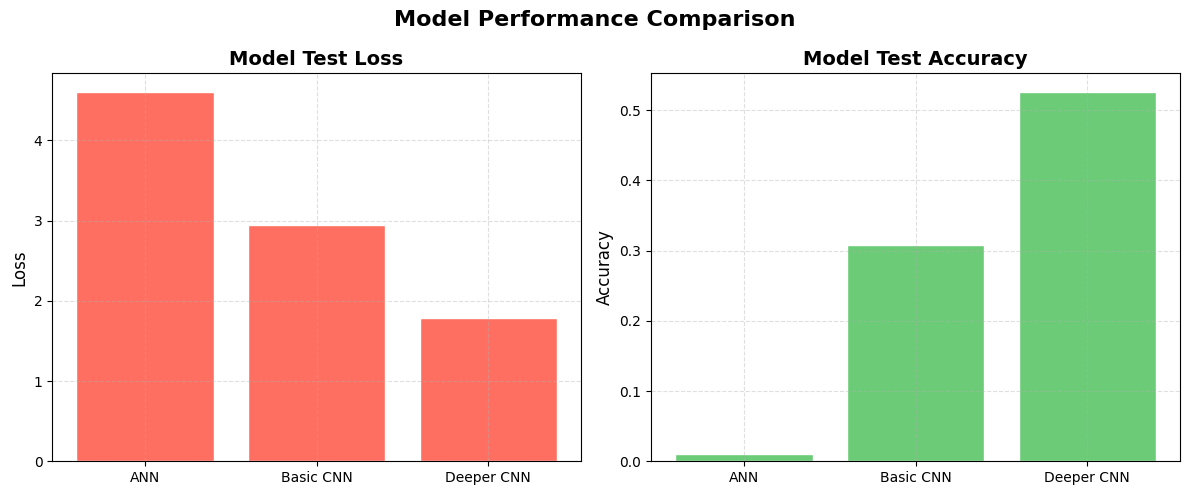

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

ann_model.load_weights('best_ann.weights.h5')
cnn_model.load_weights('best_cnn.weights.h5')
deep_cnn_model.load_weights('best_deep_cnn.weights.h5')

loss_ann,accur_ann=ann_model.evaluate(test_images,test_labels_one_hot,verbose=0)
loss_cnn,accur_cnn=cnn_model.evaluate(test_images,test_labels_one_hot,verbose=0)
loss_deep_cnn,accur_deep_cnn=deep_cnn_model.evaluate(test_images,test_labels_one_hot,verbose=0)

models=['ANN','Basic CNN','Deeper CNN']
losses=[loss_ann,loss_cnn,loss_deep_cnn]
accuracy=[accur_ann,accur_cnn,accur_deep_cnn]

fig,axes=plt.subplots(1,2,figsize=(12,5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracy, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("Model Performance Comparison", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

4.2) Model Eval (confusion matrix, report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


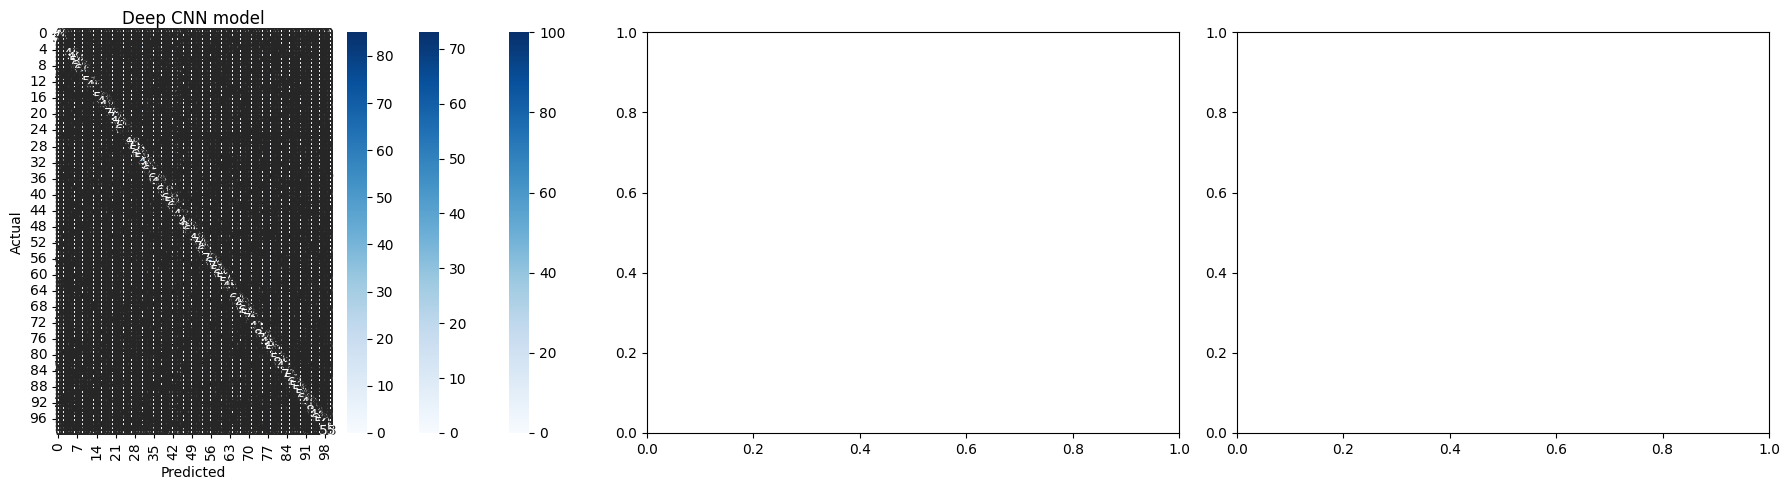

In [23]:
import seaborn as sns
ann_pred=ann_model.predict(test_images)
cnn_pred=cnn_model.predict(test_images)
deep_cnn_pred=deep_cnn_model.predict(test_images)

test_labels_int=np.argmax(test_labels_one_hot,axis=1)

ann_pred_labels=np.argmax(ann_pred,axis=1)
cnn_pred_labels=np.argmax(cnn_pred,axis=1)
deep_cnn_pred_labels=np.argmax(deep_cnn_pred,axis=1)

cm_ann=confusion_matrix(test_labels_int,ann_pred_labels)
cm_cnn=confusion_matrix(test_labels_int,cnn_pred_labels)
cm_deep_cnn=confusion_matrix(test_labels_int,deep_cnn_pred_labels)

fig,axes=plt.subplots(1,3,figsize=(18,5))

sns.heatmap(cm_ann,annot=True,fmt='d',cmap="Blues",ax=axes[0])
axes[0].set_title("ANN model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")


sns.heatmap(cm_cnn,annot=True,fmt='d',cmap="Blues",ax=axes[0])
axes[0].set_title("CNN model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_deep_cnn,annot=True,fmt='d',cmap="Blues",ax=axes[0])
axes[0].set_title("Deep CNN model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

plt.tight_layout()
plt.show()

4.3) Model Comparision


In [25]:
models={
    "ANN": ('pink',ann_history),
    "Basic CNN": ('yellow',cnn_history),
    "Deep CNN": ('cyan',deep_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_cnn, loss_deep_cnn],
    'Test Accuracy': [accur_ann, accur_cnn, accur_deep_cnn]
}

performance_df=pd.DataFrame(performance_data)

fig=make_subplots(rows=1,cols=2,subplot_titles=('Accuracy','Loss'))

for name, (color,history) in models.items():
  fig.add_trace(go.Scatter(y=history.history['accuracy'],mode='lines',name=name,line=dict(color=color,dash='solid')),row=1,col=1)
  fig.add_trace(go.Scatter(y=history.history['val_accuracy'],mode='lines',name=name,line=dict(color=color,dash='dot'),showlegend=False),row=1,col=1)
  fig.add_trace(go.Scatter(y=history.history['loss'],mode='lines',name=name,line=dict(color=color,dash='solid')),row=1,col=2)
  fig.add_trace(go.Scatter(y=history.history['val_loss'],mode='lines',name=name,line=dict(color=color,dash='dot'),showlegend=False),row=1,col=2)

fig.update_layout(
    title_text="Model Comparision: Accuracy and Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200
)

fig.show()

4.4) Predictions

Done using Basic CNN model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


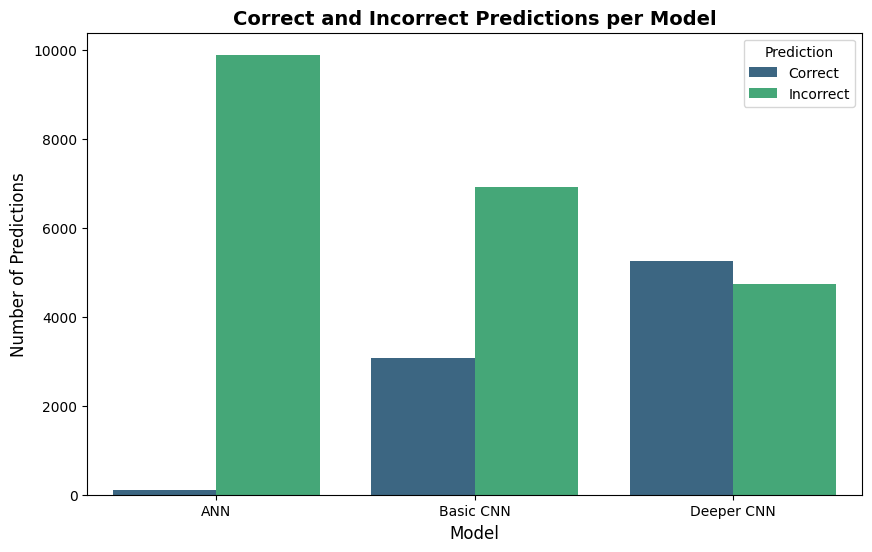

In [31]:
ann_predictions=ann_model.predict(test_images)
ann_predictions_labels=np.argmax(ann_predictions,axis=1)

cnn_predictions=cnn_model.predict(test_images)
cnn_predictions_labels=np.argmax(cnn_predictions,axis=1)

deep_cnn_predictions=deep_cnn_model.predict(test_images)
deep_cnn_predictions_labels=np.argmax(deep_cnn_predictions,axis=1)

test_labels_int=np.argmax(test_labels_one_hot,axis=1)

correct_ann=(np.where(ann_predictions_labels==test_labels_int))[0]
incorrect_ann=(np.where(ann_predictions_labels!=test_labels_int))[0]

correct_cnn=(np.where(cnn_predictions_labels==test_labels_int))[0]
incorrect_cnn=(np.where(cnn_predictions_labels!=test_labels_int))[0]

correct_deep_cnn=(np.where(deep_cnn_predictions_labels==test_labels_int))[0]
incorrect_deep_cnn=(np.where(deep_cnn_predictions_labels!=test_labels_int))[0]

data = {'Model': ['ANN', 'ANN', 'Basic CNN', 'Basic CNN', 'Deeper CNN', 'Deeper CNN'],
        'Prediction': ['Correct', 'Incorrect', 'Correct', 'Incorrect', 'Correct', 'Incorrect'],
        'Count': [len(correct_ann), len(incorrect_ann), len(correct_cnn), len(incorrect_cnn), len(correct_deep_cnn), len(incorrect_deep_cnn)]}
prediction_df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Count', hue='Prediction', data=prediction_df, palette='viridis')
plt.title('Correct and Incorrect Predictions per Model', fontsize=14, fontweight='bold')
plt.ylabel('Number of Predictions', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

#Project Summary and Conclusion

##ANN

1. TRAINING:
The model completed training in 7 epochs of the total 30 by using checkpoints and early stopping. In the last epoch it had the following accuracy scores: **accuracy: 0.0101 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052**

Since its val_accuracy was not increasing we stopped at 7 epoch and we can conclude that this model has performed the worst.

2. ACCURACY:
When we compare its accuracy as well as loss with the other two models we can see that it has the highest loss value and the lowest accuracy score

4. PREDICTION: The number of correct predictions are closer to 0 while the incorrect predictions are close to the max value i.e. 1000. While we can increase its accuracy by running it a few more times comparing only once run model for each concludes ANN to be the worst model for this dataset.
##CNN

1. TRAINING: Our model completed 10 epochs before early stopping and had the following accuracy scores: **accuracy: 0.7168 - loss: 0.9881 - val_accuracy: 0.2888 - val_loss: 4.4948**
The training model accuracy is impressively high with aroung 70% correct predictions but the value accuracy is still very low. But a lot higher than ANN.
2. ACCURACY: Seeing its plot we can conclude that a Basic CNN model has almost the same amount of loss as well as accuracy values

4. PREDICTION:
While the correct predictions are pretty high with around 3000 correct values the incorrect predictions are still higher with approximately 7000 values. While it is a better model than ANN when we train a deeper CNN model we can conclude that it is the best of the three.
##DEEP CNN

1. TRAINING: The model took all of the 30 epochs time for training with the final values being: **accuracy: 0.5898 - loss: 1.4343 - val_accuracy: 0.4771 - val_loss: 2.0119**
While the accuracy score is lower than the accuracy of CNN, the value accuracy is higher than that of CNN. i.e. it is a stable model with almost equal accuracy score for training as well testing model
2. ACCURACY: The loss function is the lowest for Deep CNN with the accuracy score being the max it can achieve.
4. PREDICTION: The number of correct and incorrect predictions are almost equal in value with the correct predictions being slightly more in volume and thus we can conclude that for this dataset Deep CNN is the best among the three with respect to accuracy and loss as well as the number of correct and incorrect predictions